**Load data into Train , validation and Test:** 

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm 
from sklearn.metrics import confusion_matrix
import copy

data=pd.read_csv('fashion-mnist.csv').to_numpy()
np.random.shuffle(data)

Y=data[:,-1]
X=data[:,:-1]

X_S=X[0:int(len(data)*0.5)]
X_V=X[int(len(data)*0.5):int(len(data)*0.85)]
X_T=X[int(len(data)*0.85):]

Y_S=Y[0:int(len(data)*0.5)]
Y_V=Y[int(len(data)*0.5):int(len(data)*0.85)]
Y_T=Y[int(len(data)*0.85):]


In [2]:
###### function for plot confusion matrix ######
def plot_confmat(CM,name):
    confussion_mat=copy.deepcopy(CM)
    (a,a)=confussion_mat.shape
    ###### save confussion matrix as an image #####
    plt.imshow(confussion_mat,  cmap=plt.cm.Blues);
    thresh=confussion_mat.max()/2
    for i in range(a):
        for j in range(a):
            number=copy.deepcopy(confussion_mat[i, j])
            if number==float(0):
                number=int(number)
            number=round(number,3)
            if(confussion_mat[i, j] > thresh) : color="white"
            else: color="black"
            fontweight='normal'
            if float(number)>0.5 : fontweight='bold'
            plt.text(j, i,number ,horizontalalignment="center",color=color,fontsize='large',fontweight =fontweight)
    plt.xticks(np.arange(a), np.arange(a),fontsize='x-large',fontweight ='bold')
    plt.yticks(np.arange(a),  np.arange(a),fontsize='x-large',fontweight ='bold')
    plt.title(name,fontsize='xx-large'); plt.ylabel('True label',fontsize='xx-large'); plt.xlabel('Predicted label',fontsize='xx-large');

## Method 1: Linear SVM

In [3]:

clf=svm.SVC(kernel='linear').fit(X_S, Y_S)

Y_V_predict=clf.predict(X_V)
CM_V=confusion_matrix(Y_V,Y_V_predict,normalize='true')
print('\nAccuracy for Validation data:',round(np.sum(np.diag(CM_V))/np.sum(CM_V)*100,3),' %')

Y_T_predict=clf.predict(X_T)
CM_T=confusion_matrix(Y_T,Y_T_predict,normalize='true')
print('\nAccuracy for Test data:',round(np.sum(np.diag(CM_T))/np.sum(CM_T)*100,3),' %\n')


Accuracy for Validation data: 80.615  %

Accuracy for Test data: 80.467  %



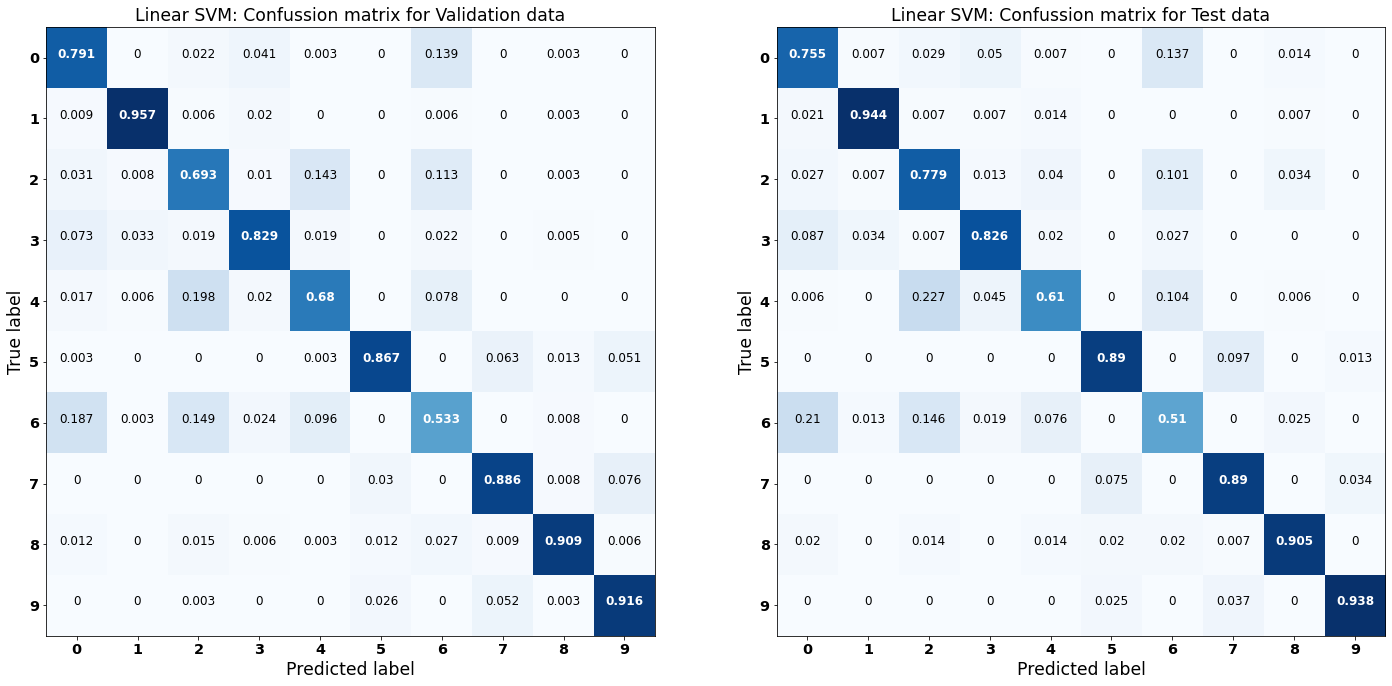

In [4]:
fig=plt.figure(figsize=(24, 12))
plt.subplot(121)
plot_confmat(CM_V,'Linear SVM: Confussion matrix for Validation data')
plt.subplot(122)
plot_confmat(CM_T,'Linear SVM: Confussion matrix for Test data')


## Method 2: SVM with Gaussian kernel

In [5]:
result=[]
gamma_range = np.logspace(-8, -6, 8)
for sigma in gamma_range:
    clf2=svm.SVC(kernel='rbf',gamma=sigma).fit(X_S, Y_S)
    Y_V_predict=clf2.predict(X_V)
    CM_V=confusion_matrix(Y_V,Y_V_predict,normalize='true')
    acc=np.sum(np.diag(CM_V))/np.sum(CM_V)
    result.append([acc, sigma , clf2])

result.sort(key=lambda x:x[0] , reverse=True)
[sigma , clf] = result[0][1:]
print('\nBest sigma for Gaussian kerenl:',str(sigma))

Y_V_predict=clf.predict(X_V)
CM_V_rbf=confusion_matrix(Y_V,Y_V_predict,normalize='true')
print('\nAccuracy for Validation data:',round(np.sum(np.diag(CM_V_rbf))/np.sum(CM_V_rbf)*100,3),' %')

Y_T_predict=clf.predict(X_T)
CM_T_rbf=confusion_matrix(Y_T,Y_T_predict,normalize='true')
print('\nAccuracy for Test data:',round(np.sum(np.diag(CM_T_rbf))/np.sum(CM_T_rbf)*100,3),' %\n')


Best sigma for Gaussian kerenl: 2.6826957952797275e-07

Accuracy for Validation data: 85.196  %

Accuracy for Test data: 85.478  %




******
<b>Attention:</b> At first,we train rbf SVM with a wide variety of sigmas , then we train again with a limited range but more tries to get best possible result. but for making the code faster we choose to not bring the first part of training which was finding the range of better accuracy 
******

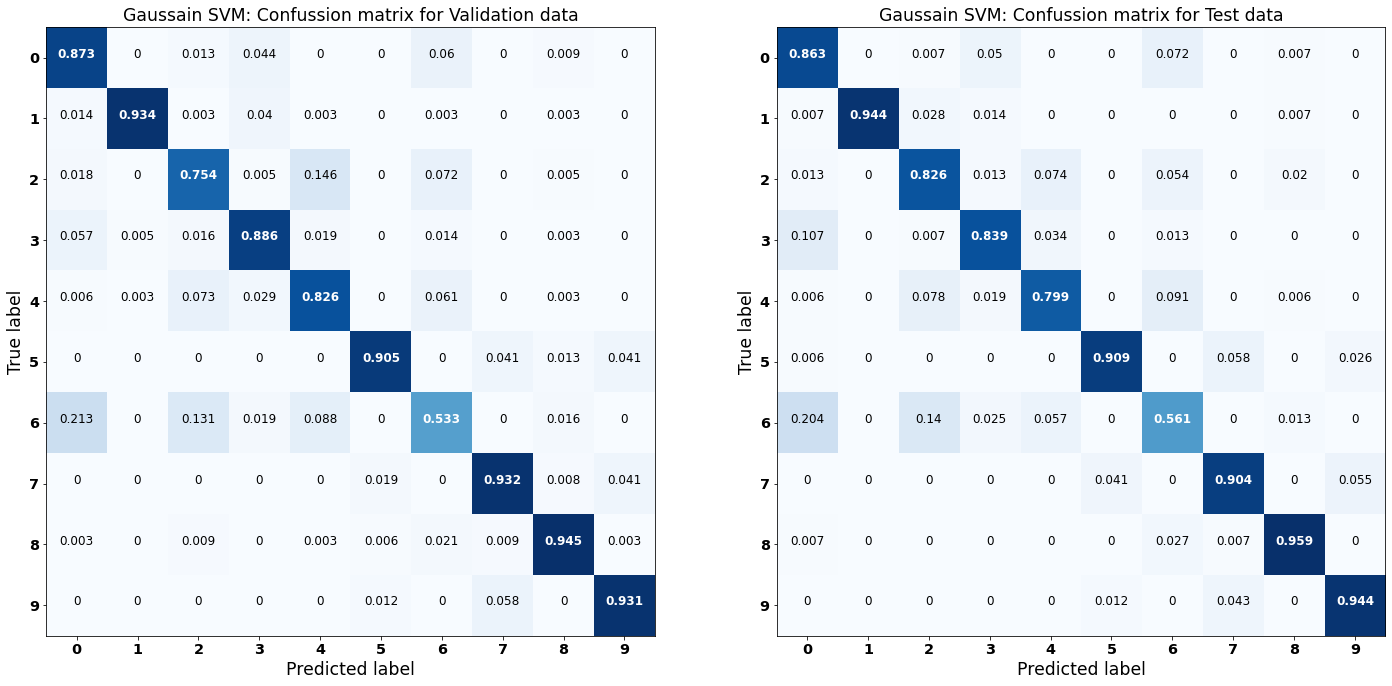

In [6]:
fig=plt.figure(figsize=(24, 12))
plt.subplot(121)
plot_confmat(CM_V_rbf,'Gaussain SVM: Confussion matrix for Validation data')
plt.subplot(122)
plot_confmat(CM_T_rbf,'Gaussain SVM: Confussion matrix for Test data')


## Method 3: K-nearest-neighbor

In [7]:
from sklearn.neighbors import KNeighborsClassifier

result=[]
for k in range(1,21):
    neigh = KNeighborsClassifier(n_neighbors=k ,metric='euclidean')
    neigh=neigh.fit(X_S, Y_S)
    Y_V_predict=neigh.predict(X_V)
    CM_V_knn=confusion_matrix(Y_V,Y_V_predict,normalize='true')
    acc=np.sum(np.diag(CM_V_knn))/np.sum(CM_V_knn)
    result.append([acc, k , neigh])
    
result.sort(key=lambda x:x[0] , reverse=True)
[k , neigh] = result[0][1:]
print('\nBest K for K-nearest-neighbor:',str(k))

Y_V_predict=neigh.predict(X_V)
CM_V_knn=confusion_matrix(Y_V,Y_V_predict,normalize='true')
print('\nAccuracy for Validation data:',round(np.sum(np.diag(CM_V_knn))/np.sum(CM_V_knn)*100,3),' %')

Y_T_predict=neigh.predict(X_T)
CM_T_knn=confusion_matrix(Y_T,Y_T_predict,normalize='true')
print('\nAccuracy for Test data:',round(np.sum(np.diag(CM_T_knn))/np.sum(CM_T_knn)*100,3),' %\n')



Best K for K-nearest-neighbor: 6

Accuracy for Validation data: 80.853  %

Accuracy for Test data: 80.663  %



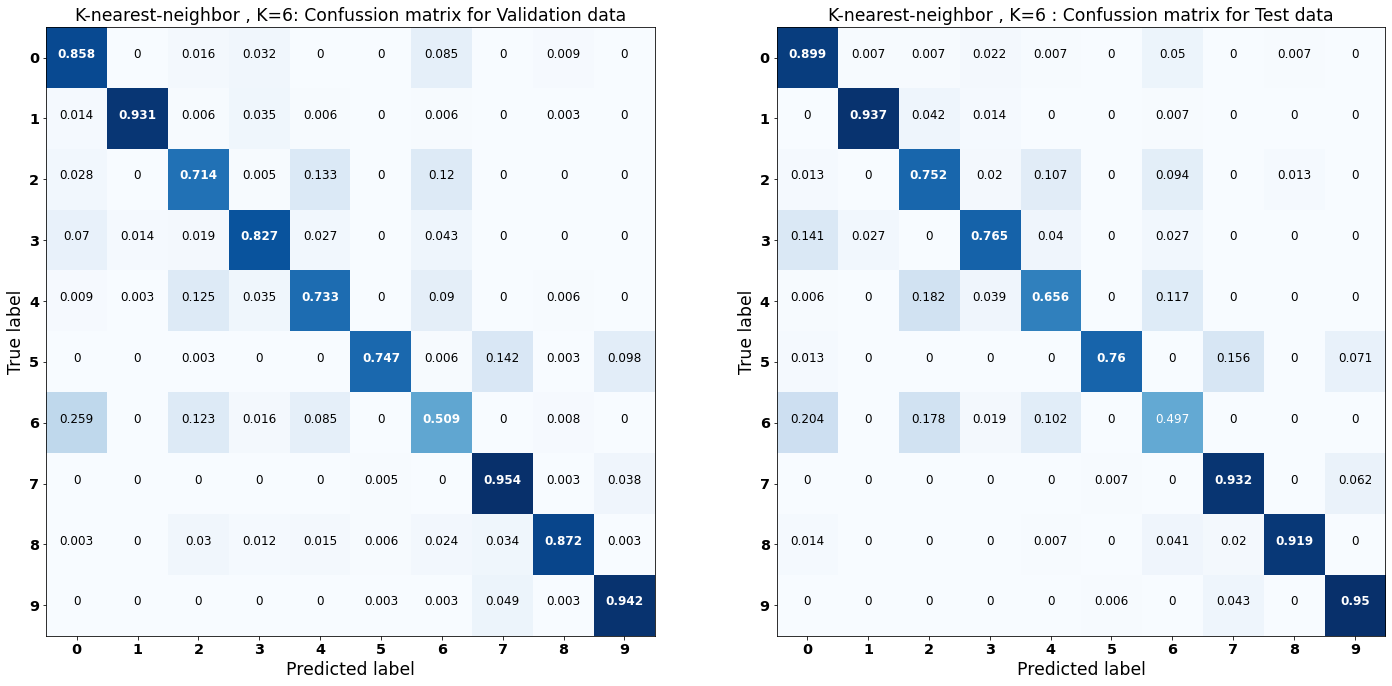

In [8]:
fig=plt.figure(figsize=(24, 12))
plt.subplot(121)
plot_confmat(CM_V_knn,'K-nearest-neighbor , K=%d: Confussion matrix for Validation data'%k)
plt.subplot(122)
plot_confmat(CM_T_knn,'K-nearest-neighbor , K=%d : Confussion matrix for Test data'%k)

## Method 4: Decision Tree

In [9]:
from sklearn import tree

clf_tree = tree.DecisionTreeClassifier().fit(X_S, Y_S)

Y_V_predict=clf_tree.predict(X_V)
CM_V_tree=confusion_matrix(Y_V,Y_V_predict,normalize='true')
print('\nAccuracy for Validation data:',round(np.sum(np.diag(CM_V_tree))/np.sum(CM_V_tree)*100,3),' %')

Y_T_predict=clf_tree.predict(X_T)
CM_T_tree=confusion_matrix(Y_T,Y_T_predict,normalize='true')
print('\nAccuracy for Test data:',round(np.sum(np.diag(CM_T_tree))/np.sum(CM_T_tree)*100,3),' %\n')



Accuracy for Validation data: 74.082  %

Accuracy for Test data: 74.416  %



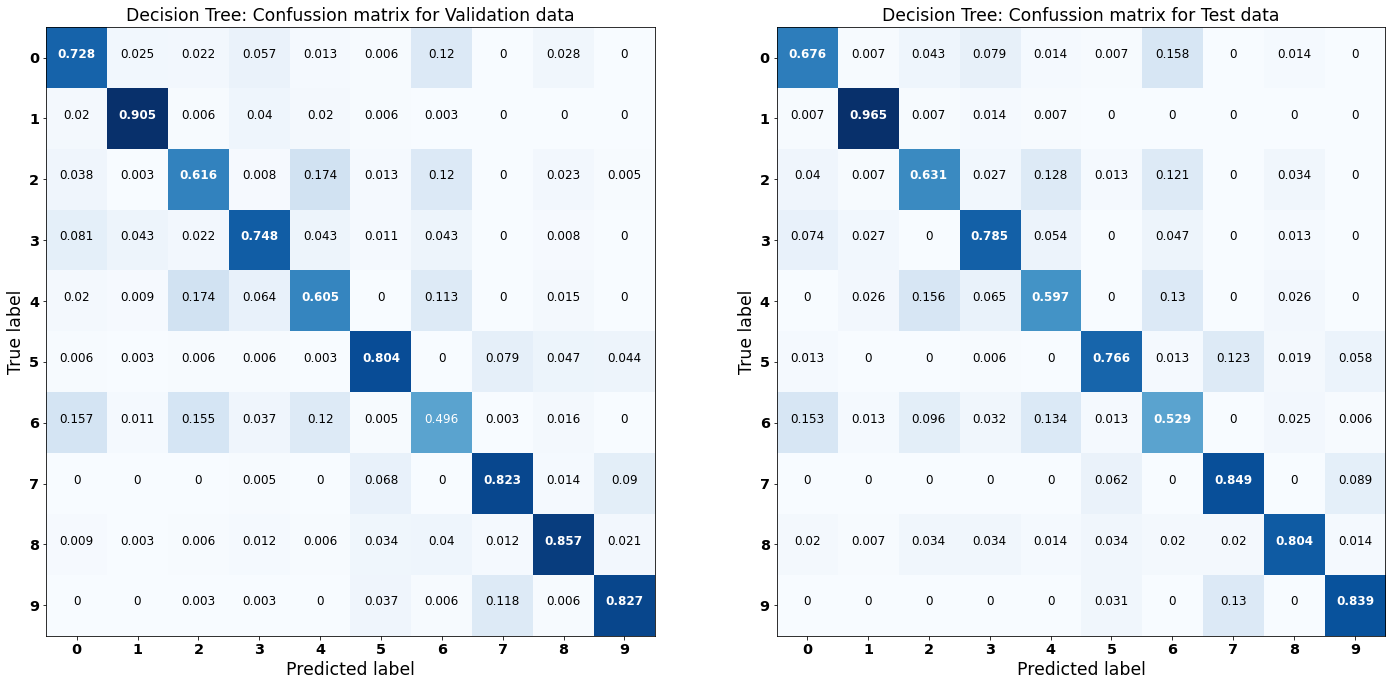

In [10]:
fig=plt.figure(figsize=(24, 12))
plt.subplot(121)
plot_confmat(CM_V_tree,'Decision Tree: Confussion matrix for Validation data')
plt.subplot(122)
plot_confmat(CM_T_tree,'Decision Tree: Confussion matrix for Test data')


## Method 5: Neural Network

In [11]:
def my_convert(arr_in):
    tmp=np.zeros((arr_in.shape[0],10))
    for i,row in enumerate(arr_in):
        tmp[i][row]=1
    return tmp.copy()

In [12]:
from tensorflow.keras import models, layers ,Sequential ,losses , optimizers

### layer input
inputs = layers.Input(X_S.shape[1:])
### hidden layers
hidden1 = layers.Dense(100,name="hidden1",activation='sigmoid')(inputs)
hidden2 = layers.Dense(100,name="hidden2", activation='sigmoid')(hidden1)
### layer output
outputs = layers.Dense(10,name="output", activation='softmax')(hidden2)

model = models.Model(inputs=inputs, outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = model.fit(X_S, my_convert(Y_S), validation_data=(X_V, my_convert(Y_V)), epochs=100, verbose=0)


***
<b>conclusion:</b>
Best Activation Function for hidden layer was `Sigmoid`.
***


Test loss: 0.60107
Test Accuracy: 78.8  %



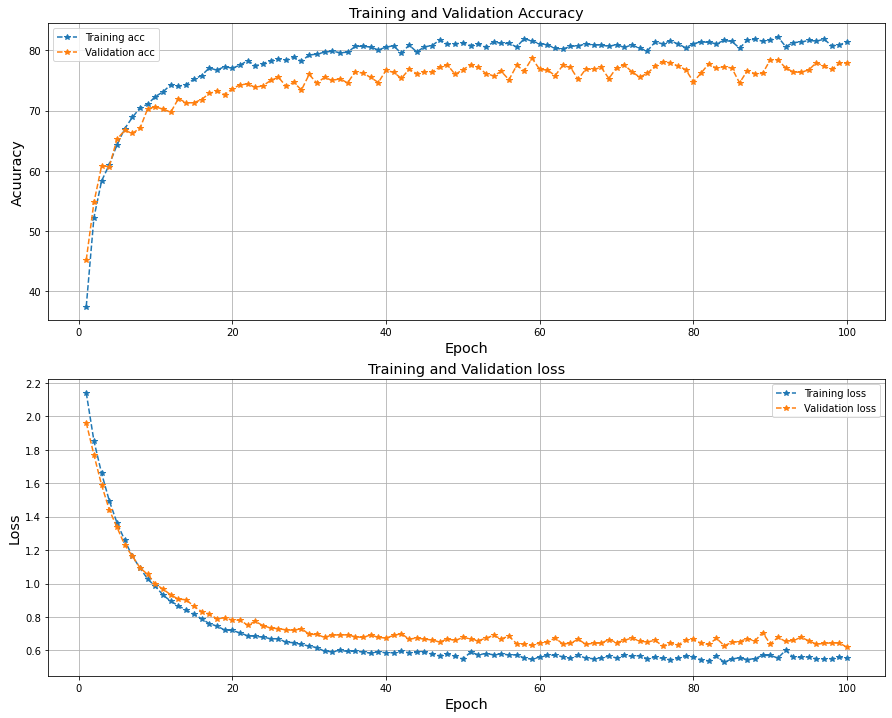

In [13]:
Test_loss, Test_acc = model.evaluate(X_T, my_convert(Y_T), verbose=0)
print('\nTest loss:',str(round(Test_loss,5)))
print('Test Accuracy:',str(round(100*Test_acc,4)),' %\n')

fig=plt.figure(figsize=(15,12))
plt.subplot(211)
plt.plot(range(1, 101), np.array(history.history['accuracy'])*100, '*--', label='Training acc')
plt.plot(range(1, 101), np.array(history.history['val_accuracy'])*100, '*--', label='Validation acc')
plt.title('Training and Validation Accuracy',fontsize='x-large'); 
plt.legend();plt.grid();plt.xlabel("Epoch",fontsize='x-large'); plt.ylabel("Acuuracy",fontsize='x-large')
plt.subplot(212)
plt.plot(range(1, 101), history.history['loss'], '*--', label='Training loss')
plt.plot(range(1, 101), history.history['val_loss'], '*--', label='Validation loss')
plt.title('Training and Validation loss',fontsize='x-large')
plt.grid();plt.xlabel("Epoch",fontsize='x-large'); plt.ylabel("Loss",fontsize='x-large'); plt.legend()
plt.show()
